<a href="https://colab.research.google.com/github/siddhant230/Machine_Learning/blob/master/GaussianMixtureModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.colors as mcolors

In [2]:
def plotter(data, mus, sigmas, class_probabs, title=None):
 
  colors = list(mcolors.TABLEAU_COLORS)
  bool_class_mask = np.array([True for _ in range(len(data))], dtype='bool')
  for index, (mu, sigma, probab, c) in enumerate(zip(mus, sigmas, class_probabs, colors)):
    mask = norm.pdf(data, mu, sigma) >= probab/2

    bool_class_mask = bool_class_mask & ~mask
    indexes = np.where(mask)
    data_points = data[indexes]
    plt.scatter(indexes, data_points, 
                color=c, label=f'class_{index+1}')
  
  # plotting outliers
  extra_indexes = np.where(bool_class_mask)
  extra_data_points = data[extra_indexes]
  plt.scatter(extra_indexes, extra_data_points, 
              color=colors[-1], label='outlier')
  plt.xlabel('n_samples') 
  plt.ylabel('location')
  plt.title(title)
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

  plt.show()

In [3]:
def data_generator(true_class_probabs=[0.6, 0.4],
                   true_mus=[2.5, 4.8],true_sigmas=[0.6, 0.3], n_samples = 1000, 
                   n_classes = 2, generate_random=True):
  # if generate_random:
  true_class_probabs= np.random.dirichlet(np.ones(n_classes))
  true_mus=np.random.rand(n_classes)*10
  true_sigmas=np.random.rand(n_classes)

  univariate_gaussian_model = tfp.distributions.MixtureSameFamily(
      mixture_distribution=tfp.distributions.Categorical(probs=true_class_probabs),
      components_distribution=tfp.distributions.Normal(loc=true_mus, scale=true_sigmas)
  )
  data = univariate_gaussian_model.sample(n_samples).numpy()

  return data, {'mus':true_mus, 'sigmas':true_sigmas, 
                'class_probabs':true_class_probabs}

# data = data_generator()

In [4]:
def expectation_maximization(dataset, n_classes, n_iterations):
  n_samples = dataset.shape[0]

  # Random initial guess
  guessed_mus = np.random.rand(n_classes)
  guessed_sigmas = np.random.rand(n_classes)
  guessed_class_probabs = np.random.dirichlet(np.ones(n_classes))

  for each_epoch in tqdm(range(n_iterations)):

    # Step 1: Expectation calculation
    responsibilities = tfp.distributions.Normal(loc=guessed_mus, scale=guessed_sigmas).prob(
        dataset.reshape(-1, 1)
    ).numpy() * guessed_class_probabs

    responsibilities /= np.linalg.norm(responsibilities, axis=1, ord=1, keepdims=True)
    class_responsibilities = np.sum(responsibilities, axis=0)

    # Step 2: Minimization
    for c in range(n_classes):
      guessed_class_probabs[c] = class_responsibilities[c]/n_samples  # back to probab (normalization)
      guessed_mus[c] = np.sum(responsibilities[:, c]*dataset)/class_responsibilities[c]
      guessed_sigmas[c] = np.sqrt(np.sum(responsibilities[:, c]* (dataset - guessed_mus[c])**2)/class_responsibilities[c])

  return {'mus':guessed_mus, 'sigmas':guessed_sigmas, 
                'class_probabs':guessed_class_probabs}

In [5]:
def sort_meta(meta):
  meta_values = np.array(list(meta.values()))
  meta_values_order = np.argsort(meta_values[2, :])[::-1]
  meta_values = meta_values[:, meta_values_order]
  return {'mus':meta_values[0], 'sigmas':meta_values[1], 
                'class_probabs':meta_values[2]}
# meta = {'mus': np.array([8.6919454 , 5.30855692]), 'sigmas': np.array([0.23272833, 0.0113988 ]), 'class_probabs': np.array([0.37404083, 0.62595917])}
# sort_meta(meta)

[INFO]
n_samples: 500
n_iterations:100
n_classes:3
random_seed:92
data size:  (500,)
expected:  {'mus': array([4.78869647e+00, 3.54059732e-03, 8.56367046e+00]), 'sigmas': array([0.35332169, 0.48674905, 0.44127311]), 'class_probabs': array([0.50744395, 0.36329047, 0.12926558])}



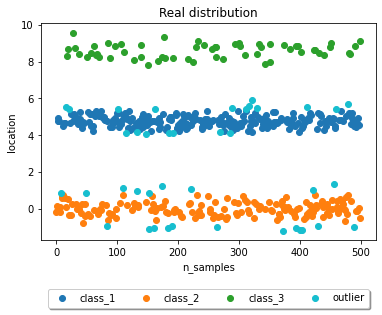

  0%|          | 0/100 [00:00<?, ?it/s]

predicted:  {'mus': array([ 5.48248521, -0.02509309,  0.92504283]), 'sigmas': array([1.56380746, 0.45651488, 0.22069903]), 'class_probabs': array([0.63347448, 0.35955129, 0.00697423])}


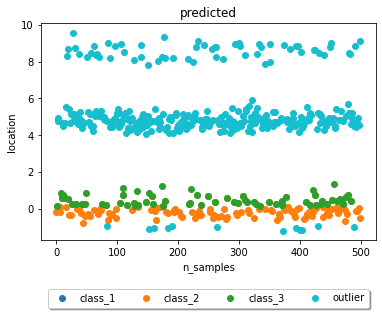




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:100
n_classes:3
random_seed:33
data size:  (500,)
expected:  {'mus': array([8.70395688, 1.85039927, 2.60299691]), 'sigmas': array([0.95325203, 0.6804508 , 0.01966143]), 'class_probabs': array([0.42315035, 0.37461717, 0.20223247])}



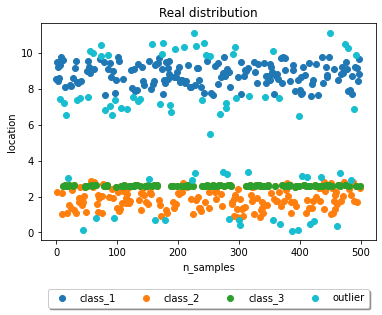

  0%|          | 0/100 [00:00<?, ?it/s]

predicted:  {'mus': array([8.70160965, 1.82232484, 2.60518841]), 'sigmas': array([0.96462624, 0.69900431, 0.02067216]), 'class_probabs': array([0.41799946, 0.36589157, 0.21610897])}


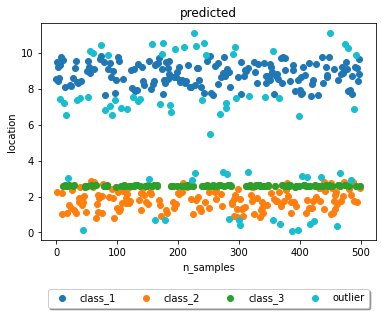




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:150
n_classes:3
random_seed:83
data size:  (500,)
expected:  {'mus': array([8.27366628, 3.56684144, 7.77130434]), 'sigmas': array([0.74340916, 0.28254052, 0.38673607]), 'class_probabs': array([0.45363467, 0.42929987, 0.11706546])}



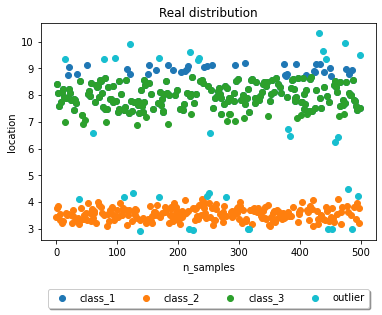

  0%|          | 0/150 [00:00<?, ?it/s]

predicted:  {'mus': array([8.11286529, 3.57094263, 3.28868565]), 'sigmas': array([0.68264869, 0.27757917, 0.002147  ]), 'class_probabs': array([0.51000019, 0.48125436, 0.00874545])}


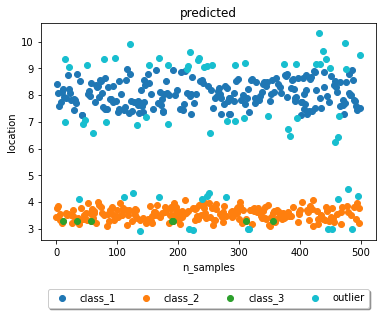




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:200
n_classes:2
random_seed:32
data size:  (500,)
expected:  {'mus': array([5.55128778, 9.55656549]), 'sigmas': array([0.7366696 , 0.81620514]), 'class_probabs': array([0.80765646, 0.19234354])}



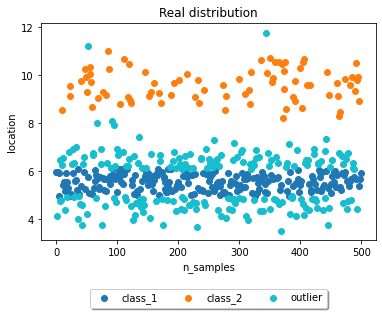

  0%|          | 0/200 [00:00<?, ?it/s]

predicted:  {'mus': array([5.56381071, 9.59574859]), 'sigmas': array([0.75066371, 0.76172576]), 'class_probabs': array([0.83090907, 0.16909093])}


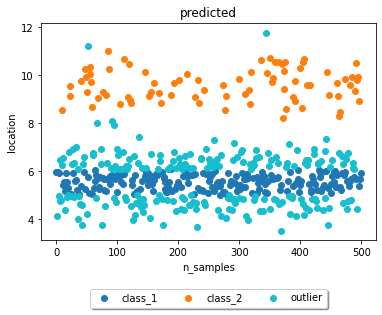




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:200
n_classes:2
random_seed:10
data size:  (500,)
expected:  {'mus': array([6.33648235, 7.48803883]), 'sigmas': array([0.49850701, 0.22479665]), 'class_probabs': array([0.98598621, 0.01401379])}



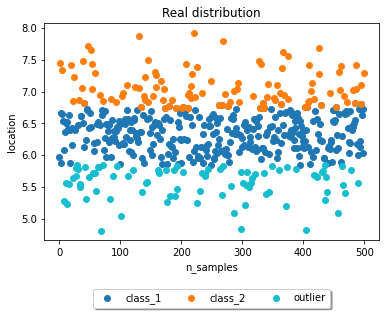

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


predicted:  {'mus': array([nan, nan]), 'sigmas': array([nan, nan]), 'class_probabs': array([nan, nan])}


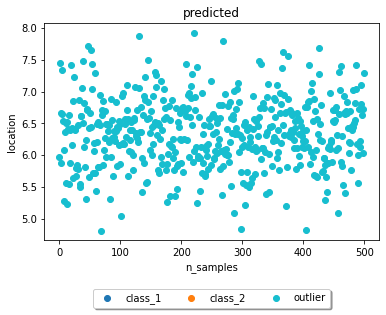




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:200
n_classes:2
random_seed:62
data size:  (500,)
expected:  {'mus': array([4.11402   , 8.46085097]), 'sigmas': array([0.29094324, 0.63141537]), 'class_probabs': array([0.95135867, 0.04864133])}



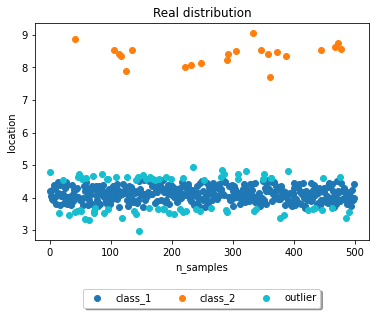

  0%|          | 0/200 [00:00<?, ?it/s]

predicted:  {'mus': array([nan, nan]), 'sigmas': array([nan, nan]), 'class_probabs': array([nan, nan])}


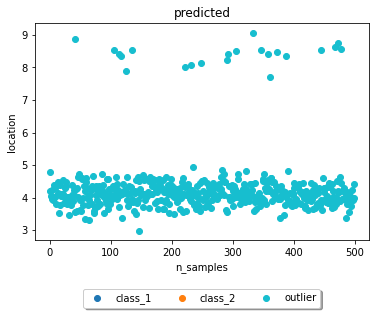




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:150
n_classes:2
random_seed:8
data size:  (500,)
expected:  {'mus': array([5.30855692, 8.6919454 ]), 'sigmas': array([0.0113988 , 0.23272833]), 'class_probabs': array([0.62595917, 0.37404083])}



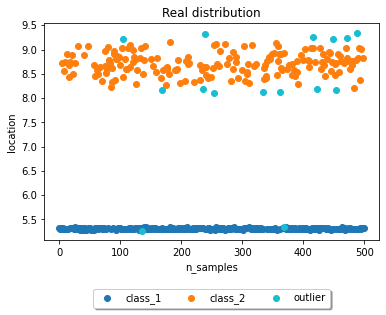

  0%|          | 0/150 [00:00<?, ?it/s]

predicted:  {'mus': array([5.30861067, 8.70302667]), 'sigmas': array([0.01189241, 0.25411817]), 'class_probabs': array([0.61, 0.39])}


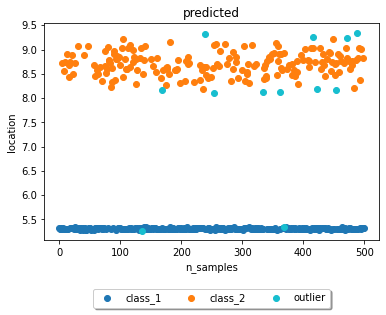




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:200
n_classes:3
random_seed:18
data size:  (500,)
expected:  {'mus': array([7.50136286, 1.81840225, 8.52233069]), 'sigmas': array([0.25696842, 0.66610167, 0.98789545]), 'class_probabs': array([0.54576861, 0.27199233, 0.18223906])}



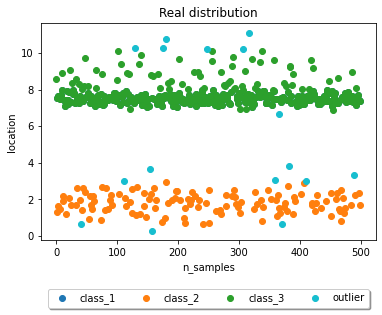

  0%|          | 0/200 [00:00<?, ?it/s]

predicted:  {'mus': array([7.77486067, 1.87528961, 0.65922989]), 'sigmas': array([0.69128556, 0.60850907, 0.02728273]), 'class_probabs': array([0.73400007, 0.26008094, 0.00591899])}


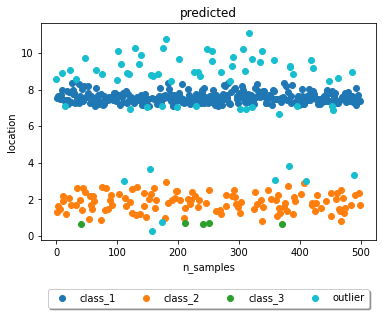




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:100
n_classes:2
random_seed:64
data size:  (500,)
expected:  {'mus': array([4.49858899, 5.95592513]), 'sigmas': array([0.311651  , 0.45701983]), 'class_probabs': array([0.63725604, 0.36274396])}



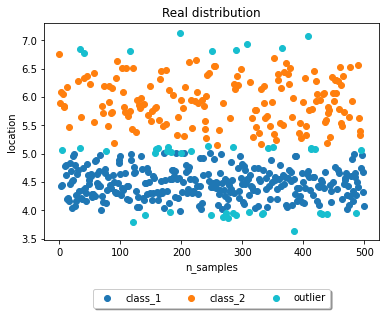

  0%|          | 0/100 [00:00<?, ?it/s]

predicted:  {'mus': array([4.45361368, 5.86099873]), 'sigmas': array([0.28933311, 0.53394177]), 'class_probabs': array([0.61508746, 0.38491254])}


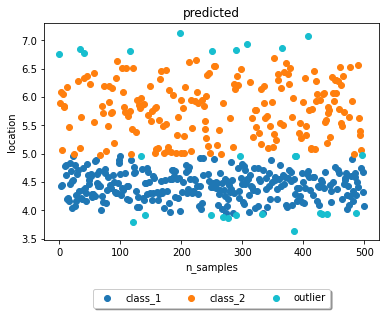




--------------------------------------------------------------------------------------------------------------------------------------



[INFO]
n_samples: 500
n_iterations:150
n_classes:3
random_seed:91
data size:  (500,)
expected:  {'mus': array([3.33078812, 7.25222741, 0.93333668]), 'sigmas': array([0.5048501 , 0.94733069, 0.65236274]), 'class_probabs': array([0.40920485, 0.36066668, 0.23012847])}



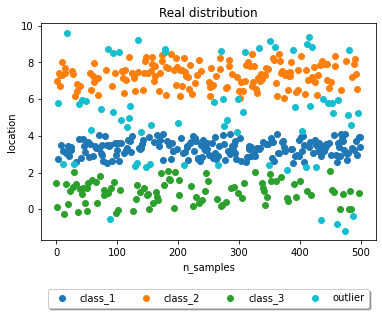

  0%|          | 0/150 [00:00<?, ?it/s]

predicted:  {'mus': array([4.69792764, 0.95501919, 0.09146121]), 'sigmas': array([2.41957103, 0.29478636, 0.20584723]), 'class_probabs': array([0.91407616, 0.06022959, 0.02569425])}


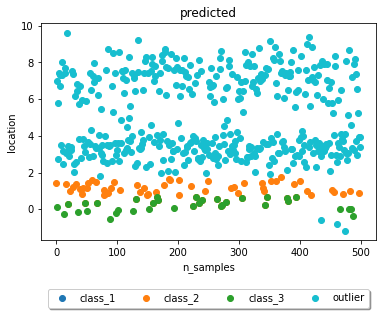




--------------------------------------------------------------------------------------------------------------------------------------





In [18]:
if __name__ == "__main__":
  for _ in range(10):
    n_samples = 500
    n_iterations=np.random.choice([100, 150, 200])
    n_classes = np.random.choice([2, 3])
    random_seed = np.random.randint(0, 100)
    np.random.seed(random_seed)

    print("[INFO]")
    print(f"n_samples: {n_samples}\nn_iterations:{n_iterations}\nn_classes:{n_classes}\nrandom_seed:{random_seed}")

    data, meta = data_generator(n_classes=n_classes, n_samples=n_samples, generate_random=True)
    meta = sort_meta(meta)
    print("data size: ", data.shape)
    print("expected: ", meta, end="\n\n")
    plotter(data, **meta, title="Real distribution")

    print("\n\n")
    guessed_meta = expectation_maximization(dataset=data,
                             n_classes=n_classes, n_iterations=n_iterations)
    guessed_meta = sort_meta(guessed_meta)
    print("predicted: ", guessed_meta)
    plotter(data, **guessed_meta, title="predicted")
    print("\n\n\n--------------------------------------------------------------------------------------------------------------------------------------\n\n\n")